# Bank Marketing Data Set

## Project Overview

Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan ('ya') atau tidak ('tidak') berlangganan.

**Ada empat kumpulan data:**
1. bank-additional-full.csv dengan semua contoh (41188) dan 20 input, diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010), sangat dekat dengan data yang dianalisis dalam [Moro et al., 2014]
2. bank-additional.csv dengan 10% dari contoh (4119), dipilih secara acak dari 1), dan 20 input.
3. bank-full.csv dengan semua contoh dan 17 input, diurutkan berdasarkan tanggal (versi lama dari kumpulan data ini dengan input yang lebih sedikit).
4. bank.csv dengan 10% contoh dan 17 input, dipilih secara acak dari 3 (versi lama dari kumpulan data ini dengan input lebih sedikit).

Kumpulan data terkecil disediakan untuk menguji algoritme pembelajaran mesin yang lebih menuntut komputasi (mis., SVM).

Tujuan klasifikasi adalah untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel y). 


**Attribute Information:**

Input variables:
**bank client data:**
1. age (numeric)
2. job : jenis pekerjaan (kategoris: 'admin.','kerah biru','pengusaha','pembantu rumah tangga','manajemen','pensiunan','wiraswasta','jasa','mahasiswa' ,'teknisi','menganggur','tidak diketahui')
3. marital : status perkawinan (kategori: 'cerai', 'menikah', 'lajang', 'tidak diketahui'; catatan: 'cerai' berarti cerai atau janda)
4. education (kategoris: 'dasar.4 tahun', 'dasar.6 tahun', 'dasar.9 tahun', 'sekolah menengah', 'buta huruf', 'kursus profesional', 'gelar universitas', 'tidak diketahui')
5. default: apakah kredit default? (kategoris: 'tidak', 'ya', 'tidak diketahui')
6. housing: memiliki pinjaman perumahan? (kategoris: 'tidak', 'ya', 'tidak diketahui')
7. loan: memiliki pinjaman pribadi? (kategoris: 'tidak', 'ya', 'tidak diketahui')

**related with the last contact of the current campaign:**

8. contact: jenis komunikasi kontak (kategori: 'seluler', 'telepon')
9. month: kontak terakhir bulan dalam setahun (kategoris: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: hari kontak terakhir dalam seminggu (kategoris: 'sen','sel','wed','kamis','fri')
11. duration: durasi kontak terakhir, dalam detik (numerik). Catatan penting: atribut ini sangat mempengaruhi target keluaran (misalnya, jika durasi=0 maka y='tidak'). Namun, durasinya tidak diketahui sebelum panggilan dilakukan. Juga, setelah akhir panggilan y jelas diketahui. Dengan demikian, input ini hanya boleh dimasukkan untuk tujuan benchmark dan harus dibuang jika tujuannya adalah untuk memiliki model prediksi yang realistis.

**other attributes:**

12. campaign: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numerik, termasuk kontak terakhir)
13. pdays: jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (numerik; 999 berarti klien tidak dihubungi sebelumnya)
14. previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numerik)
15. poutcome: hasil dari kampanye pemasaran sebelumnya (categorical: 'failure','nonexistent','success')

**social and economic context attributes**

16. emp.var.rate: tingkat variasi pekerjaan - indikator triwulanan (numerik)
17. cons.price.idx: indeks harga konsumen - indikator bulanan (numerik)
18. cons.conf.idx:  indeks kepercayaan konsumen - indikator bulanan (numerik)
19. euribor3m: tarif euribor 3 bulan - indikator harian (numerik)
20. nr.employed:  jumlah karyawan - indikator triwulanan (numerik) 

**Output variable (desired target):**

21. y - has the client subscribed a term deposit? (binary: 'yes','no')


In [1]:
# Data processing
import pandas as pd
import numpy as np

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning process
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


# features analysis libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.decomposition import PCA

%matplotlib inline

# Data Loading

## Bank Additional

In [19]:
df_bank = pd.read_csv('bank-additional-full.csv')
test_df_bank = pd.read_csv('bank-additional.csv')
print('Data sets loaded and OK !!')

Data sets loaded and OK !!


In [20]:
# cek head
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
# Memcari dimensi dataset
df_bank.shape

(41188, 21)

In [22]:
# Mencari info atribut dataset
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [23]:
# Melihat apakah ada missing values
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## ANALISIS

Missing values belum ditemukan pada data di atas

In [26]:
kategori_kolom = list(df_bank.select_dtypes(include=['object']))
kategori_kolom

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [27]:
numerik_kolom = list(df_bank.select_dtypes(include=['int64']).columns.values) + list(df_bank.select_dtypes(include=['float64']).columns.values)
numerik_kolom

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [28]:
df_bank[numerik_kolom].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [29]:
df_bank.groupby('y').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


In [30]:
df_bank[df_bank[kategori_kolom] == 'unknown'].count().sort_values(ascending=False)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
y                    0
day_of_week          0
contact              0
month                0
duration             0
nr.employed          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
age                  0
dtype: int64

In [33]:
df_bank[df_bank[kategori_kolom]=="unknown"] = np.nan

In [34]:
# Mengetahui jumlah "unknown" di setiap atribut
df_bank[
    df_bank[kategori_kolom]=='unknown'
].count().sort_values(ascending=False)

y                 0
day_of_week       0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
nr.employed       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
age               0
dtype: int64

In [35]:
print('Nama kolom')
for col in kategori_kolom:
    if df_bank[col].dtype=='object':
        print(col, df_bank[col].nunique())

Nama kolom
job 11
marital 3
education 7
default 2
housing 2
loan 2
contact 2
month 10
day_of_week 5
poutcome 3
y 2


In [36]:
# Mencetak semua nilai unik pada masing-masing kolom kategori
for cat_col in kategori_kolom:
    print("Nilai unik untuk kolom ", cat_col.upper())
    print(df_bank[cat_col].unique())
    print('='*30)

Nilai unik untuk kolom  JOB
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']
Nilai unik untuk kolom  MARITAL
['married' 'single' 'divorced' nan]
Nilai unik untuk kolom  EDUCATION
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']
Nilai unik untuk kolom  DEFAULT
['no' nan 'yes']
Nilai unik untuk kolom  HOUSING
['no' 'yes' nan]
Nilai unik untuk kolom  LOAN
['no' 'yes' nan]
Nilai unik untuk kolom  CONTACT
['telephone' 'cellular']
Nilai unik untuk kolom  MONTH
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Nilai unik untuk kolom  DAY_OF_WEEK
['mon' 'tue' 'wed' 'thu' 'fri']
Nilai unik untuk kolom  POUTCOME
['nonexistent' 'failure' 'success']
Nilai unik untuk kolom  Y
['no' 'yes']


In [37]:
df_bank[numerik_kolom].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [38]:
# Mencetak semua nilai unik pada setiap atribut numerikal
for num_col in numerik_kolom:
    print("Nilai unik untuk kolom ", num_col.upper())
    print(df_bank[num_col].unique())
    print('='*30)

Nilai unik untuk kolom  AGE
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Nilai unik untuk kolom  DURATION
[ 261  149  226 ... 1246 1556 1868]
Nilai unik untuk kolom  CAMPAIGN
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
Nilai unik untuk kolom  PDAYS
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
Nilai unik untuk kolom  PREVIOUS
[0 1 2 3 4 5 6 7]
Nilai unik untuk kolom  EMP.VAR.RATE
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
Nilai unik untuk kolom  CONS.PRICE.IDX
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.7

Melihat kolom PDAYS dan deskripsi dari UCI, disebutkan 999 adalah nilai jika belum pernah dihubungi, agar menjadi nilai yang lebih standar, mari kita ubah menjadi 0

In [39]:
df_bank.pdays.replace(999,0,inplace=True)

### ANALISIS

> Berdasarkan pengolahan data diatas, non standard missing value hanya ditemukan pada kolom kategorikal dan sudah diproses menjadi standar Nan, untuk kolom numerikal sendiri tidak ditemukan keanehan

> Selanjutnya missing values pada kolom kategorikal akan diisi dengan modus dari atribut X, dan missing values pada kolom numerikal akan diisi dengan median dari atribut Z

In [40]:
#pisahkan data kategorikal dan numerikal
#kategorikal
bank_df_kategorikal = df_bank[kategori_kolom]

#numerikal
bank_df_numerikal = df_bank[numerik_kolom]

In [41]:
# instansiasi kelas SimpleImputer untuk imputer atribut kategorikal
imputer_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [42]:
#data training
imputer_categorical.fit(bank_df_kategorikal)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [43]:
bank_df_kategorikal = imputer_categorical.transform(bank_df_kategorikal)
#buat data frame hasil transform
bank_df_kategorikal = pd.DataFrame(bank_df_kategorikal, columns=kategori_kolom)

In [44]:
df_bank = pd.concat([bank_df_numerikal, bank_df_kategorikal], axis=1)

In [46]:
# missing values pada data train
print("Jumlah nan missing values atribut kategori = ",df_bank[kategori_kolom].isnull().sum().sum())
print("Jumlah nan missing values atribut numerikal = ",df_bank[numerik_kolom].isnull().sum().sum())

Jumlah nan missing values atribut kategori =  0
Jumlah nan missing values atribut numerikal =  0


In [47]:
#tampilkan head setelah imputasi
df_bank.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,57,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,37,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,40,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,56,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [48]:
### Rename nama atribut pada data
df_bank.rename(columns={
    'job':'pekerjaan',
    'marital':'pernikahan',
    'education':'pendidikan',
    'default':'kredit_default',
    'housing':'pinjaman_rumah',
    'loan':'pinjaman_pribadi',
    'contact':'alat_komunikasi',
    'month':'kontak_terakhir_bulan',
    'day_of_week':'kontak_terakhir_hari',
    'poutcome':'luaran_marketing_sebelumnya',
    'y':'berlangganan_deposito',
    'age':'umur',
    'duration':'kontak_terakhir_berdurasi',
    'campaign':'jumlah_kontak_selama_pemasaran',
    'pdays':'jumlah_hari_berlalu',
    'previous':'jumlah_kontak_sebelum_pemasaran',
    'emp.var.rate':'tingkat_variasi_pekerjaan',
    'cons.price.idx':'indeks_harga_konsumen',
    'cons.conf.idx':'indeks_kepercayaan_konsumen',
    'euribor3m':'tarif_euribor_3bulan',
    'nr.employed':'jumlah_karyawan',
},inplace=True)

In [49]:
df_bank['berlangganan_deposito'].value_counts()

no     36548
yes     4640
Name: berlangganan_deposito, dtype: int64

In [50]:
# Eksplorasi Data (Visualisasi)
## Berapa persentase setiap nilai pada kelas target?

df_bank['berlangganan_deposito'].value_counts()

no     36548
yes     4640
Name: berlangganan_deposito, dtype: int64

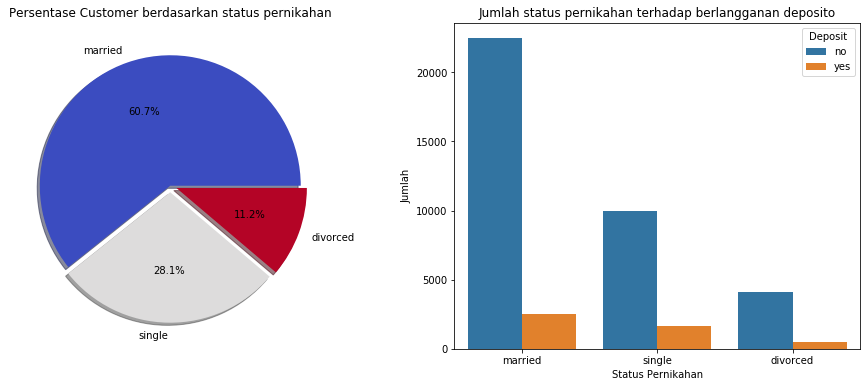

In [51]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# persentase "marital"
df_bank['pernikahan'].value_counts().plot(
    kind='pie', 
    ax=ax[0], 
    autopct='%.1f%%',
    explode=[0,0.05,0.05], 
    cmap='coolwarm',
    shadow=True,
)
ax[0].set_title('Persentase Customer berdasarkan status pernikahan')
ax[0].set_ylabel('')

# Barchart besaran setiap status pernikahan terhadap setiap kelas target
sns.countplot(
    x='pernikahan',
    hue='berlangganan_deposito',
    data=df_bank
)
ax[1].set_title('Jumlah status pernikahan terhadap berlangganan deposito')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Status Pernikahan')
ax[1].legend(title='Deposit')

### ANALISIS

Berdasarkan plotting diatas didapatkan rasio customer bank mayoritas sudah menikah dan tidak berlangganan deposito

In [52]:
df_bank.head()

,umur,kontak_terakhir_berdurasi,jumlah_kontak_selama_pemasaran,jumlah_hari_berlalu,jumlah_kontak_sebelum_pemasaran,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,tarif_euribor_3bulan,jumlah_karyawan,...,pernikahan,pendidikan,kredit_default,pinjaman_rumah,pinjaman_pribadi,alat_komunikasi,kontak_terakhir_bulan,kontak_terakhir_hari,luaran_marketing_sebelumnya,berlangganan_deposito
0,56,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,57,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,37,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,40,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,56,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [55]:
# Preprocessing Datasets sebelum Modelling
## Encoding Variabel Kategorik 
### Mengelompokkan atribut berdasarkan tipe datanya

numerik_kolom = list(df_bank.select_dtypes(include=['int64']).columns.values) + list(df_bank.select_dtypes(include=['float64']).columns.values)
kategori_kolom = list(df_bank.select_dtypes(include=['object']))

nominal_kolom = ['pekerjaan', 'pendidikan', 'alat_komunikasi', 'kontak_terakhir_bulan', 'kontak_terakhir_hari', 'luaran_marketing_sebelumnya']
ordinal_kolom = [col for col in kategori_kolom if col not in nominal_kolom]

In [56]:
#one hot encoding atribut nominal
ohe_df_bank = pd.get_dummies(df_bank[nominal_kolom], columns=nominal_kolom, prefix= nominal_kolom)

In [57]:
#label encoding variable
le_bank_df = df_bank.loc[:,ordinal_kolom]
encoder = LabelEncoder()


In [58]:
for ord_col in ordinal_kolom:
    le_bank_df[ord_col] = encoder.fit_transform(le_bank_df[ord_col])

In [59]:
### concat hasil one hot encoding dan label encoder

df_bank_categorical_encoded = pd.concat([ohe_df_bank,le_bank_df], axis = 1)
df_bank_categorical_encoded.shape

(41188, 43)

In [60]:
df_bank_categorical_encoded.head()

,pekerjaan_admin.,pekerjaan_blue-collar,pekerjaan_entrepreneur,pekerjaan_housemaid,pekerjaan_management,pekerjaan_retired,pekerjaan_self-employed,pekerjaan_services,pekerjaan_student,pekerjaan_technician,...,kontak_terakhir_hari_tue,kontak_terakhir_hari_wed,luaran_marketing_sebelumnya_failure,luaran_marketing_sebelumnya_nonexistent,luaran_marketing_sebelumnya_success,pernikahan,kredit_default,pinjaman_rumah,pinjaman_pribadi,berlangganan_deposito
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0


In [61]:
## Menyatukan data numerikal dan kategorikal encoded

df_bank = pd.concat([df_bank[numerik_kolom], df_bank_categorical_encoded], axis = 1)
df_bank.head()

,umur,kontak_terakhir_berdurasi,jumlah_kontak_selama_pemasaran,jumlah_hari_berlalu,jumlah_kontak_sebelum_pemasaran,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,tarif_euribor_3bulan,jumlah_karyawan,...,kontak_terakhir_hari_tue,kontak_terakhir_hari_wed,luaran_marketing_sebelumnya_failure,luaran_marketing_sebelumnya_nonexistent,luaran_marketing_sebelumnya_success,pernikahan,kredit_default,pinjaman_rumah,pinjaman_pribadi,berlangganan_deposito
0,56,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,1,0,0,0,0
1,57,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,1,0,0,0,0
2,37,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,1,0,1,0,0
3,40,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,1,0,0,0,0
4,56,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,1,0,0,1,0


In [62]:
# PEMBAGIAN DATASET UNTUK TRAINING DAN TESTING
# Pisahkan atribut sebagai X dan target sebagai y

X = df_bank.drop('berlangganan_deposito', axis=1)
y=df_bank['berlangganan_deposito']

In [63]:
## Train Test Split dengan rasio 70 Train : 30 Test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [64]:
print("Dimensi atribut data latih = ", X_train.shape)
print("Dimensi target data latih = ", y_train.shape)
print("Dimensi atribut data uji = ", X_test.shape)
print("Dimensi target data uji = ", y_test.shape)

Dimensi atribut data latih =  (28831, 52)
Dimensi target data latih =  (28831,)
Dimensi atribut data uji =  (12357, 52)
Dimensi target data uji =  (12357,)


In [65]:
# Normalisasi Data

standard_scaler=StandardScaler()
standard_scaler.fit(X_train)

#transform datanya dengan scaler
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

# Menerapkan PCA (Principal Component Analysis) pada data training

In [66]:
pca_ = PCA()
pca_.fit(X_train)
# mencetak nilai eigen setiap principal component
print('Nilai Eigen setiap Principal Component')
print(pca_.explained_variance_)
print("="*30)

# mencetak ratio masing-masing nilai eigen terhadap keseluruhan
print('Rasio Nilai Eigen setiap Principal Component')
print(pca_.explained_variance_ratio_)
print("="*30)

Nilai Eigen setiap Principal Component
[5.73742049e+00 2.72114088e+00 2.33626909e+00 2.09687129e+00
 1.90300644e+00 1.77576735e+00 1.66025942e+00 1.58907763e+00
 1.55005576e+00 1.28428594e+00 1.27183671e+00 1.25492695e+00
 1.22964566e+00 1.20911130e+00 1.19669143e+00 1.14632850e+00
 1.10923246e+00 1.09855836e+00 1.06319761e+00 1.05545728e+00
 1.04165012e+00 1.03204495e+00 1.02975686e+00 1.02075145e+00
 1.00947884e+00 9.99449811e-01 9.89493345e-01 9.83898233e-01
 9.68444450e-01 9.49489838e-01 9.30995732e-01 8.80735143e-01
 8.54164164e-01 7.88368844e-01 7.32231128e-01 7.13680504e-01
 6.15732696e-01 4.47321962e-01 4.26243978e-01 4.12806700e-01
 2.91254114e-01 2.41413646e-01 2.23756226e-01 1.23455681e-01
 3.93907982e-03 2.10565508e-03 1.13150668e-30 4.23049535e-31
 2.46016549e-31 2.42263477e-31 5.44595721e-32 9.75064720e-33]
Rasio Nilai Eigen setiap Principal Component
[1.10331182e-01 5.23278172e-02 4.49266934e-02 4.03230492e-02
 3.65950083e-02 3.41481877e-02 3.19269584e-02 3.05581252e-02


### Plotting Ratio Nilai Eigen yang dihasilkan PCA terhadap data latih

In [67]:
# membuat dataframe untuk memplotting variance ratio yang dihasilkan PCA
pca_variance = pd.DataFrame(data=pca_.explained_variance_ratio_,columns=['PC Variance'])
pca_variance['pc_name'] = pd.Series(data=['PC-'+str(i+1) for i in range(0,X_train.shape[1])])
pca_variance = pca_variance.sort_values(by='PC Variance')

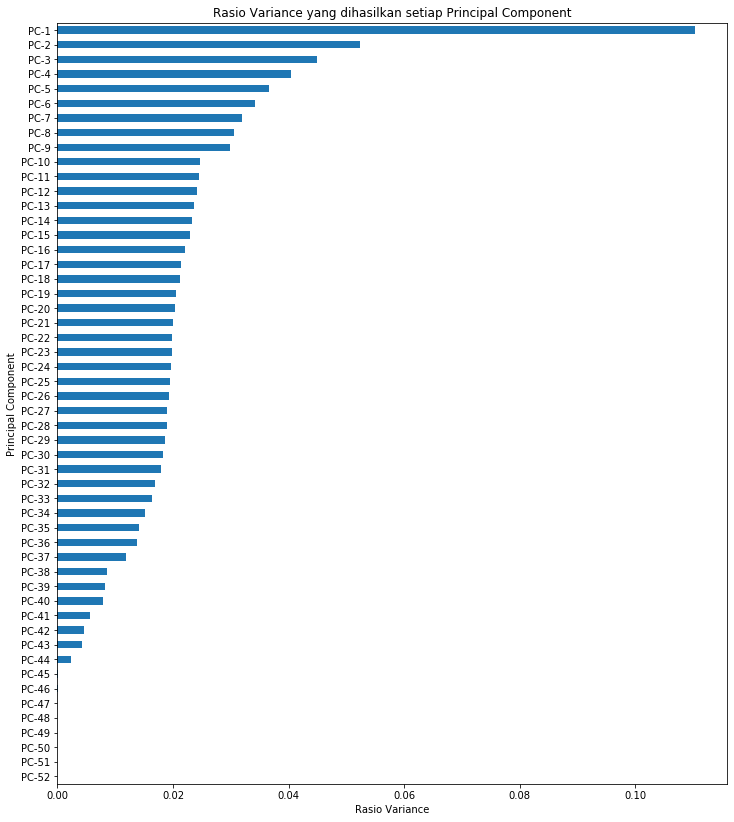

In [68]:
plt.figure(figsize=(12,14))
pca_variance['PC Variance'].plot(kind='barh')
plt.yticks(ticks=range(0,X_train.shape[1]), labels=pca_variance['pc_name'])
plt.title('Rasio Variance yang dihasilkan setiap Principal Component')
plt.xlabel('Rasio Variance')
plt.ylabel('Principal Component')
plt.show()

In [69]:
### Mencari jumlah principal component terbaik yang menghasilkan nilai eigen >= 1
# Mencari jumlah n_component yang menghasilkan nilai eigen value >= 1
def find_best_n_components(pca):
    """
        Deskripsi Fungsi:
        - Fungsi untuk mencari jumlah principal component terbaik dari hasil PCA pada data latih 
        dengan syarat nilai eigen PC >= 1
        
        Parameter Fungsi:
        -pca : model pca yang sudah difitting pada data latih
        
        Return Fungsi:
        -n_best_component: jumlah principal component terbaik yang memenuhi syarat
        
    """
    
    n_best_component = 0
    for i in range(0,len(pca.explained_variance_)):
        if pca.explained_variance_[i]>=1:
            n_best_component+=1
    
    return n_best_component

In [70]:
# mencari jumlah principal component terbaik
n_components = find_best_n_components(pca_)
print('Jumlah n Principal Component terbaik = {} komponen'.format(n_components))
print('Informasi yang dijelaskan oleh {} komponen = {} %'.format(n_components,(np.sum(pca_.explained_variance_ratio_[:n_components]))*100))
print('Kehilangan Informasi = {} %'.format(100-(np.sum(pca_.explained_variance_ratio_[:n_components]))*100))

Jumlah n Principal Component terbaik = 25 komponen
Informasi yang dijelaskan oleh 25 komponen = 75.81049109869411 %
Kehilangan Informasi = 24.189508901305885 %


### Instansiasi PCA dengan n component terbaik
***
1. Buat PCA dengan n component terbaik
2. Fitting ke data latih 
3. Transform ke atribut data latih dan data uji

In [71]:
# instansiasi objek PCA
pca_ = PCA(n_components=n_components)

# fit into training data
pca_.fit(X_train)

# transform into train and test data
X_train_pca = pca_.transform(X_train)
X_test_pca = pca_.transform(X_test)

In [72]:
# buat dataframe untuk mempermudah melihat data hasil PCA
train_pca_df = pd.DataFrame(data=X_train_pca,columns=['PC-'+str(i) for i in range(0,n_components)])
train_pca_df['target'] = y_train.to_numpy()

test_pca_df = pd.DataFrame(data=X_test_pca,columns=['PC-'+str(i) for i in range(0,n_components)])
test_pca_df['target'] = y_test.to_numpy()

## Data Train

In [73]:
train_pca_df.head()

,PC-0,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,...,PC-16,PC-17,PC-18,PC-19,PC-20,PC-21,PC-22,PC-23,PC-24,target
0,5.468982,0.192738,1.839463,-0.648917,-1.248918,-1.114195,-0.288405,-0.197083,0.727937,-2.079771,...,-2.630165,-1.040815,1.278964,2.908790,1.192220,-4.036429,2.741069,2.416579,9.364609,0
1,0.757117,0.920114,-0.323011,-1.960238,-2.426915,1.488456,-1.153879,-0.492650,-0.860386,-0.695632,...,-0.287412,0.082612,-0.407964,0.375186,-0.249510,0.493637,-0.611484,-0.604050,0.458891,0
2,-2.067666,2.247794,-0.741717,0.921240,-0.605226,0.214643,-0.949536,0.959384,0.948604,0.460350,...,2.821758,-0.587734,0.157724,0.850030,1.722926,0.708364,0.476875,1.136650,0.114695,0
3,4.025143,0.937672,-0.950728,-1.326521,0.528028,-0.092192,0.413709,-2.178119,1.647444,0.363893,...,-0.105171,-0.791568,-0.310204,-0.134814,-0.313698,0.592341,-0.101042,-0.599505,0.129892,0
4,1.720112,-0.036293,-1.503587,-2.308196,-0.953276,-0.399497,1.313068,1.078912,-0.347024,-1.110926,...,-0.546727,0.899791,0.904970,-0.214899,-0.858870,-0.015860,-0.084889,0.293755,1.079557,0


In [74]:
### Target train
y_train.head()

39075    0
34855    0
7107     0
31614    0
34878    0
Name: berlangganan_deposito, dtype: int32

In [75]:
# Data Uji
# Atribut

test_pca_df.head()

,PC-0,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,...,PC-16,PC-17,PC-18,PC-19,PC-20,PC-21,PC-22,PC-23,PC-24,target
0,4.004429,1.042806,-0.724986,0.116078,0.663465,1.355072,1.385564,-2.551725,0.991560,-1.029260,...,-0.746248,0.245695,1.014505,0.116344,-0.043204,-0.746954,-0.130729,0.674596,0.079068,0
1,-1.710564,0.615348,1.431398,-0.616270,-1.616272,-1.222241,-0.386510,-0.397924,0.188579,0.446589,...,-0.180114,0.707852,-0.074450,0.531830,0.119974,-0.204000,-0.064261,0.148848,-0.263208,0
2,3.767322,2.318267,-2.404535,0.361172,0.726334,0.431419,-1.734979,-0.978927,2.469173,-1.957413,...,-1.014851,-0.497993,0.043951,-0.044399,-0.884787,0.343497,-0.493471,-0.652098,0.343006,0
3,-2.707690,1.512554,1.050036,-1.940677,0.575429,-0.859069,1.100665,-0.908809,-0.921700,-1.804670,...,0.557886,0.142295,0.297021,-0.225429,-0.698445,0.060968,-0.216795,0.131951,0.523233,0
4,-1.330538,-1.208040,-0.804284,0.046139,2.143805,-0.538200,1.808360,0.513637,-0.073966,-1.149172,...,-0.641617,2.559121,-0.146530,0.095943,-0.656259,0.977509,-0.223099,0.020492,-0.179007,0


In [76]:
### Target Test

y_test.head()

32884    0
3169     0
32206    0
9403     0
14020    0
Name: berlangganan_deposito, dtype: int32

### Kembali ke rubrik penilaian, klasifikasi ML yang digunakan adalah

1. Logistic Regression
2. K Nearest Neighbor (KNN)
3. Support Vector Machine (SVM)
4. Decision Tree
5. Random Forest
6. Naive Bayes

**Alur**

1. Setiap model akan dilihat performanya dengan akurasi untuk pertama kali. Semua model yang digunakan akan menggunakan default parameter pada masing-masing model.

2. Hasil akurasi setiap model akan dibandingkan dengan boxplot

3. Model dengan akurasi terbaik akan dilanjutkan dengan analisis confusion matrix

In [77]:
# Inisialisasi fold dan scoring yang digunakan
num_fold = 10
scoring_accuracy ='accuracy'
scoring_recall = 'recall'

In [78]:
# buat list dari seluruh model yang digunakan
models = []

# append model
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K-Nearest Neighbor', KNeighborsClassifier()))
models.append(('Support Vector Machine', SVC()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Naive Bayes', GaussianNB()))

#k-fold cross validation initialization object
kfold = KFold(n_splits=num_fold, random_state=42, shuffle=True)

In [79]:
def perform_model(models,X_train,y_train,kfold, scoring='accuracy'):
    """
        Deskripsi Function:
        - Fungsi ini digunakan untuk melakukan model cross-validation dengan data latih yang ada. Setiap model
        akan divalidasi dengan ukuran skor (scoring) yang telah ditetapkan, semisal (akurasi, recall, etc).
        
        Function parameters:
        - models: list of tuples dari model yang ingin dituning (LogisticRegression, SVM, etc)
        - X_train: dataframe atau np.array dari atribut data latih yang sudah dipreprocessing
        - y_train: dataframe atau np.array dari target data latih yang sudah dipreprocessing
        - kfold: objek hasil instansiasi kelas KFold 
        - scoring: metode untuk memngukur performa model (accuracy, recall, precision, etc)
        
        Function returns:
        - cv_results: List dari hasil cross validation setiap model yang sudah dituning
        - model_names: List dari nama setiap model (string)
        - print_msg: List berupa pesan untuk menampilkan model dengan hasil performanya pada data validasi
    """
    cv_results = [] #menampung hasil crossvalidation setiap model
    model_names = [] #menampung nama model
    print_msg = [] #menampung pesan yang akan ditampilkan
    
    
    for model_name, model in models:
        #cross validation result
        cv_result = cross_val_score(model,X_train,y_train, cv=kfold,scoring=scoring)

        #append into list
        cv_results.append(cv_result)
        model_names.append(model_name)

        #print result
        msg_result = "{}: mean {} = {}  std {} = {}".format(model_name,scoring,cv_result.mean(),scoring,cv_result.std())
        print_msg.append(msg_result)
    
    return cv_results,model_names,print_msg

In [80]:
cv_results_accuracy, model_names, print_msg_accuracy = perform_model(
    models=models,
    X_train=X_train_pca,
    y_train=y_train,
    kfold=kfold,
    scoring=scoring_accuracy
)

In [81]:
# cetak hasil rata-rata akurasi setiap model
for msg in print_msg_accuracy:
    print(msg)

Logistic Regression: mean accuracy = 0.9004200095927969  std accuracy = 0.005725887923422318
K-Nearest Neighbor: mean accuracy = 0.8940377808984034  std accuracy = 0.0072413688412600406
Support Vector Machine: mean accuracy = 0.903264196882293  std accuracy = 0.004804611750114506
Decision Tree: mean accuracy = 0.8708682298980633  std accuracy = 0.005723332476504217
Random Forest: mean accuracy = 0.9034027127313349  std accuracy = 0.003334927697496897
Naive Bayes: mean accuracy = 0.8810310019565648  std accuracy = 0.007097140177764308


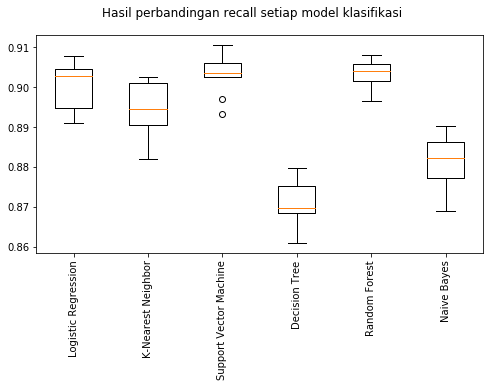

In [83]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Hasil perbandingan recall setiap model klasifikasi')
ax = fig.add_subplot(111)

plt.boxplot(cv_results_accuracy)
ax.set_xticklabels(model_names, rotation=90)
fig.set_size_inches(8,4)
plt.show()

**ANALISIS** <br>
1.Random Forest tampil dengan rata-rata recall terbaik dibandingkan model-model lainnya.
2. Decision tree dan Naive Bayes memberikan akurasi paling rendah.

## CONFUSION MATRIX SVM

In [85]:
# inisialisasi model SVM dengan default parameter
svm = SVC()

# fit model into training data
svm.fit(X_train_pca,y_train)

# get y prediction
y_pred = svm.predict(X_test_pca)

In [86]:
# print results
print("SVM Recall score = ", metrics.recall_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

# confusion matrix
print(metrics.confusion_matrix(y_test,y_pred))

SVM Recall score =  0.30885529157667385
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10968
           1       0.66      0.31      0.42      1389

    accuracy                           0.90     12357
   macro avg       0.79      0.64      0.68     12357
weighted avg       0.89      0.90      0.89     12357

[[10746   222]
 [  960   429]]
